In [2]:
%pylab inline
import csv

Populating the interactive namespace from numpy and matplotlib


# Load all the data.

In [7]:
x = np.genfromtxt(
    "classification_vs_measures.csv",
    delimiter=",",
    names=True,
    missing_values=[""],
    filling_values=[0.0])

In [25]:
x.dtype.names

('classification',
 'measure_new_score',
 'measure_coursestddev',
 'measure_speedddev',
 'measure_speeddavg',
 'distance_to_shore',
 'distance_to_port',
 'despoof_speed',
 'speed')

In [30]:
xfishy = x[x["classification"] > 0.5]
xnonfishy = x[x["classification"] < 0.5]

In [31]:
def clamp(x, low, high):
    return where(x <= high,
        where(x >= low, x, low),
        high)

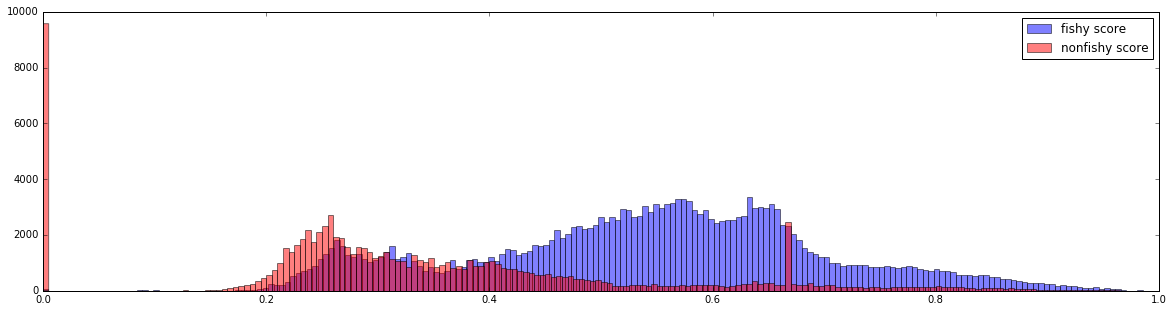

In [20]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(111)
subplot.hist(xfishy["measure_new_score"], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
subplot.hist(xnonfishy["measure_new_score"], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()
show()

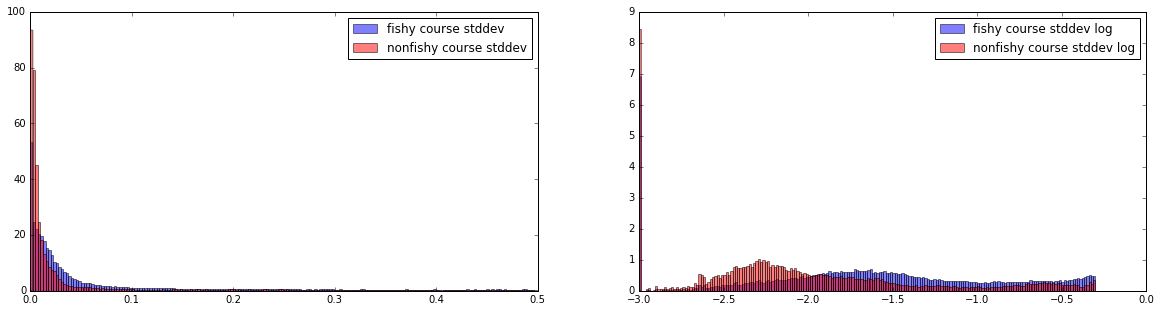

In [22]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(121)
subplot.hist(xfishy["measure_coursestddev"], bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev")
subplot.hist(xnonfishy["measure_coursestddev"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev")
legend()

subplot = histfig.add_subplot(122)
subplot.hist(log10(xfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log")
subplot.hist(log10(xnonfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log")
legend()
show()


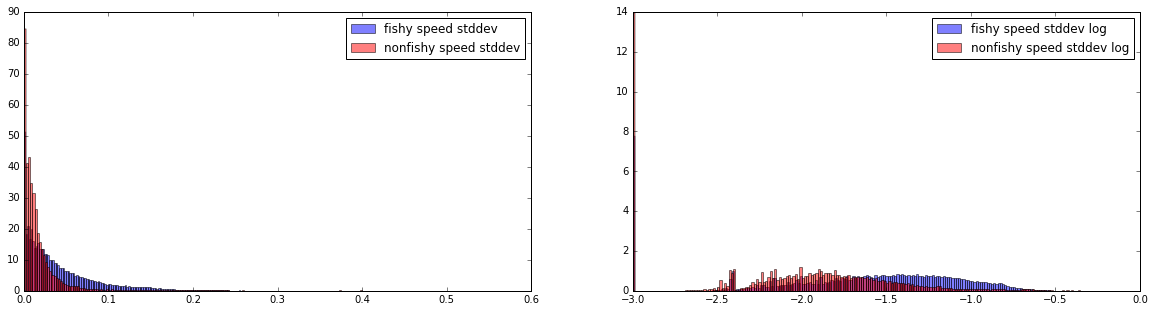

In [26]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(121)
subplot.hist(xfishy["measure_speedddev"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev")
subplot.hist(xnonfishy["measure_speedddev"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev")
legend()

subplot = histfig.add_subplot(122)
subplot.hist(log10(xfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log")
subplot.hist(log10(xnonfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log")
legend()
show()

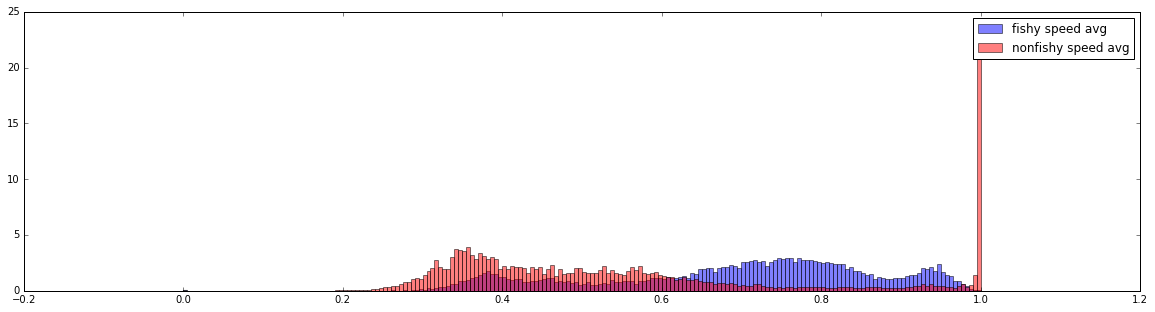

In [29]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(111)
subplot.hist(xfishy["measure_speeddavg"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed avg")
subplot.hist(xnonfishy["measure_speeddavg"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed avg")
legend()
show()

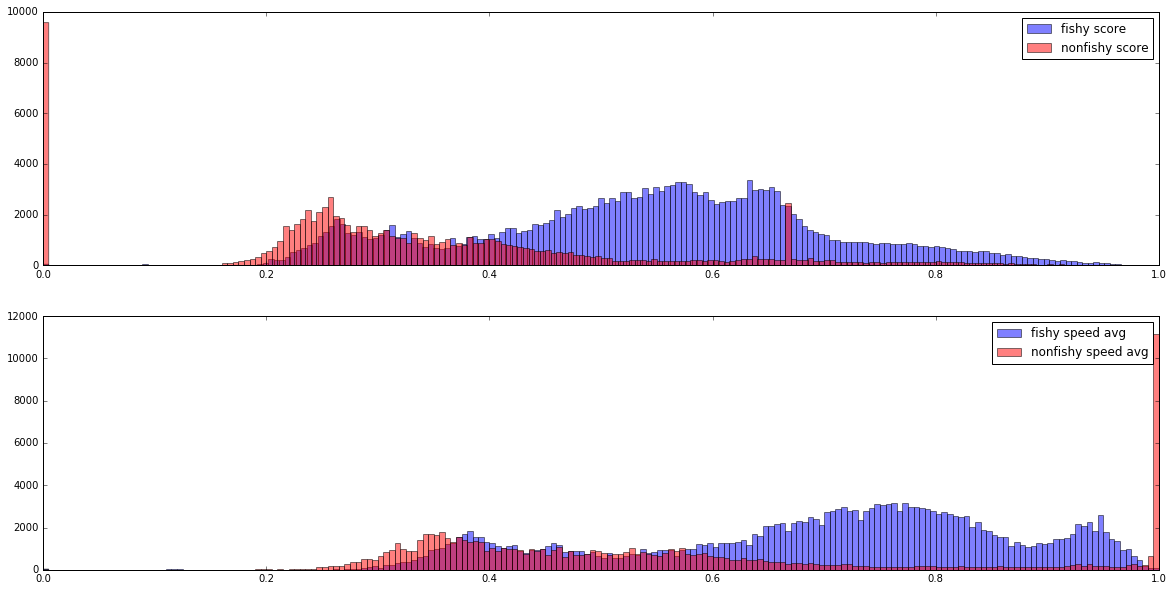

In [34]:
histfig = figure(figsize=(20,10))
subplot = histfig.add_subplot(211)
subplot.hist(xfishy["measure_new_score"], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
subplot.hist(xnonfishy["measure_new_score"], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(212)
xfishy_speed_clamp = clamp(xfishy["measure_speeddavg"], 0, 1)
xnonfishy_speed_clamp = clamp(xnonfishy["measure_speeddavg"], 0, 1)
subplot.hist(xfishy_speed_clamp, bins=200, normed=False, color='b', alpha=0.5, label="fishy speed avg")
subplot.hist(xnonfishy_speed_clamp, bins=200, normed=False, color='r', alpha=0.5, label="nonfishy speed avg")
legend()

show()

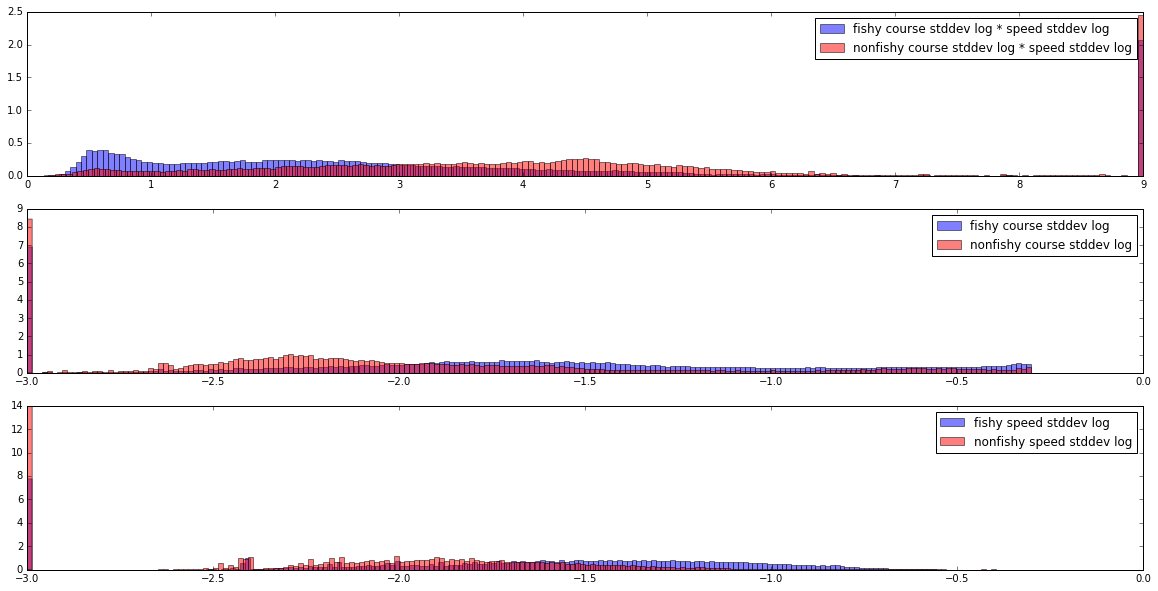

In [37]:
histfig = figure(figsize=(20,10))

subplot = histfig.add_subplot(311)
subplot.hist(log10(xfishy["measure_coursestddev"]+0.001)*log10(xfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log * speed stddev log")
subplot.hist(log10(xnonfishy["measure_coursestddev"]+0.001)*log10(xnonfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log * speed stddev log")
legend()

subplot = histfig.add_subplot(312)
subplot.hist(log10(xfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log")
subplot.hist(log10(xnonfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log")
legend()

subplot = histfig.add_subplot(313)
subplot.hist(log10(xfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log")
subplot.hist(log10(xnonfishy["measure_speedddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log")
legend()


show()


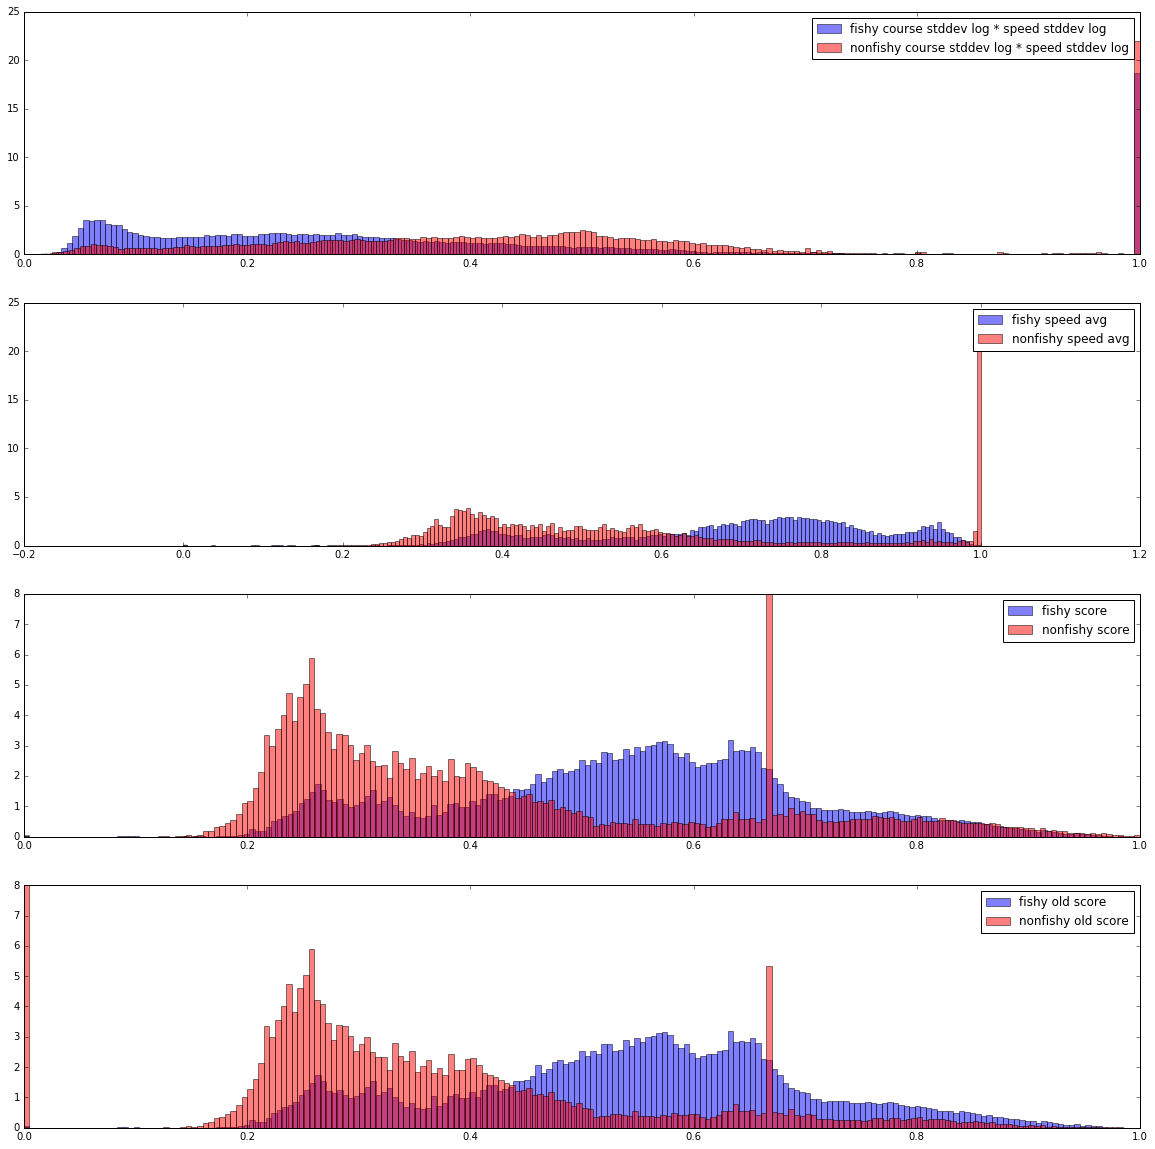

In [38]:
histfig = figure(figsize=(20,20))

subplot = histfig.add_subplot(411)
subplot.hist(log10(xfishy["measure_coursestddev"]+0.001)*log10(xfishy["measure_speedddev"]+0.001)/9., bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log * speed stddev log")
subplot.hist(log10(xnonfishy["measure_coursestddev"]+0.001)*log10(xnonfishy["measure_speedddev"]+0.001)/9., bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log * speed stddev log")
legend()

subplot = histfig.add_subplot(412)
subplot.hist(xfishy["measure_speeddavg"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed avg")
subplot.hist(xnonfishy["measure_speeddavg"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed avg")
legend()

subplot = histfig.add_subplot(413)
subplot.hist(clamp((xfishy["measure_coursestddev"]+xfishy["measure_speedddev"]+xfishy["measure_speeddavg"])*2./3., 0, 1), bins=200, normed=True, color='b', alpha=0.5, label="fishy score")
subplot.hist(clamp((xnonfishy["measure_coursestddev"]+xnonfishy["measure_speedddev"]+xnonfishy["measure_speeddavg"])*2./3., 0, 1), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(414)
subplot.hist(xfishy["measure_new_score"], bins=200, normed=True, color='b', alpha=0.5, label="fishy old score")
subplot.hist(xnonfishy["measure_new_score"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy old score")
subplot.set_ylim(0., 8.)
legend()

show()